Classification Using Long-short term memory networks [LSTM]

#Importing

In [ ]:
# For DataFrame
import pandas as pd

# Matplot & Seaborn for Visualizing the analysis of the data.
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

import seaborn as sns

In [ ]:
# Scikit-learn for data analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.manifold import TSNE
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

In [ ]:
# Keras, this library helps with neural network connections
import tensorflow#used for debugging.
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences#Debugged an error.
from keras.models import Sequential
from keras.layers import (LSTM, 
                          Activation,
                          Conv1D,
                          MaxPooling1D,
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.initializers import Constant
from tensorflow.keras import optimizers

In [ ]:
# nltk, this library helps us to process the human language i.e., tweets in this case.
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Extra imports based on suggestions
# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict

# Warnings
import warnings 
warnings.filterwarnings('ignore')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [ ]:
#importing  test dataset into train.
train = pd.read_csv("/content/train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#importing Test Dataset onto test

test = pd.read_csv("/content/test.csv")
test.head()


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# Checking Submission Dataset
#urop
sub = pd.read_csv("/content/submission.csv")
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


#Preprocesing

In [ ]:
# Collating both train and test datasets for data pre-processing 
df_train_uptd = train.drop("target", axis = 1)

# Combing both test and train datasets for merged dataset creation
# Here data schema betwee the two datases are exactly similar. Hence we can use concat() to merge rows

df = pd.concat([df_train_uptd,test], axis = 0, ignore_index= True)
print("Total rows present = ", len(df))
df.head(5)

Total rows present =  10876


,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


Text(0.5, 1.0, 'Sentiment Distribution')

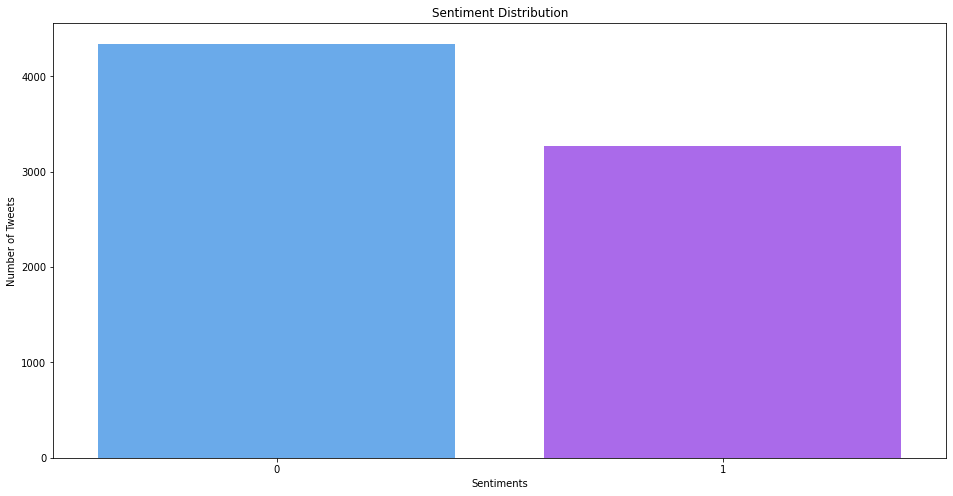

In [ ]:
#Here just we have visualized the data sets using a function from matplt.lib
plt.figure(figsize=(16,8))
x = train.target.value_counts()
sns.barplot(x.index, x, palette='cool')
plt.gca().set_ylabel('Number of Tweets')
plt.gca().set_xlabel('Sentiments')
plt.title("Sentiment Distribution")

Here 0 is Taken as False, 1 is taken as True.

In [ ]:
# urop
# In this we are deciding what should be the stop words and what are not to be considered as stop words
stop_words = set(stopwords.words("english"))
stop_words.remove('not')
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stop_words = stop_words.union(more_stopwords)                
stemmer = SnowballStemmer("english")


In [ ]:
#In the process of preprocessing we call this function for removing URLs in the data
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')#refered from prepinsta
    return url.sub(r'', text)

In [ ]:
#In the process of preprocessing we call this function for removing Emojis in the tweets data.
def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags 
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [ ]:
#In the process of preprocessing we call this function for removing inner html links #urop
def remove_html(text):
    html = re.compile(r'^[^ ]<.#*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+') # '#' was added specially by me to remove hashtags. 
    return re.sub(html, '', text)


In [ ]:
#In the process of preprocessing we call this function for removing punctuations
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


In [ ]:
#In the process of preprocessing we call this function for removing quotes.
def remove_quotes(text):
    quotes = re.compile(r'[^A-Za-z0-9\s]+')
    return re.sub(quotes, '', text)

In [ ]:
# Applying helper functions on the data frame choosen.

df['mod_text'] = df['text'].apply(lambda x: remove_URL(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_emoji(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_html(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_punct(x))
df['mod_text'] = df['mod_text'].apply(lambda x: remove_quotes(x))
df.head() #just to the sample #urop

,id,keyword,location,text,mod_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...


In [ ]:
# In this we have tokenized the tweet data further.

df['tokenized'] = df['mod_text'].apply(word_tokenize)

df.head()

,id,keyword,location,text,mod_text,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [ ]:
# Here we have lowered all the text so that it is easy to proccess further
df['lower'] = df['tokenized'].apply(
    lambda x: [word.lower() for word in x])
df.head()

,id,keyword,location,text,mod_text,tokenized,lower
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala..."


In [ ]:
# In  this we will remove stop words that we defined prior, this time it is useless words, prepositions.
#UROP
#Used standard stop words that were mentioned in "Socket" API 
df['stopwords_removed'] = df['lower'].apply(
    lambda x: [word for word in x if word not in stop_words])
df.head()
#here we can see that size of text is decreasing & it will be easy to proccess.

,id,keyword,location,text,mod_text,tokenized,lower,stopwords_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
# Applying part of speech tags.

#Here we add tags for each token what type of POS it is, using nltk std. function!
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)

df.head()#for sample

,id,keyword,location,text,mod_text,tokenized,lower,stopwords_removed,pos_tags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."


In [ ]:
#for re labeling the POS.

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df['wordnet_pos'] = df['pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df.head()

,id,keyword,location,text,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (..."


In [ ]:
# Applying word lemmatizer.

# By applying this we have joined back the sentance again with correct phrasing of words. We call it as Lemmitizing.
wnl = WordNetLemmatizer()

df['lemmatized'] = df['wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df['lemmatized'] = df['lemmatized'].apply(
    lambda x: [word for word in x if word not in stop_words])

df['lemma_str'] = [' '.join(map(str, l)) for l in df['lemmatized']]

df.head()

,id,keyword,location,text,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...


In [ ]:
#we are checking whether the whole tuples remains same or not after all preprocessors.
print("Total Rows :", len(df.lemmatized))

Total Rows : 10876


In [ ]:
df_final = df[["lemma_str", "id"]]
df_final.head()

,lemma_str,id
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,4
2,resident ask shelter place notify officer evac...,5
3,13000 people receive wildfire evacuation order...,6
4,get sent photo ruby alaska smoke wildfires pou...,7


In [ ]:
treated_train = pd.merge(train, df_final, on='id')
treated_train.tail()

,id,keyword,location,text,target,lemma_str
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse nearby home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5km volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate ebike collide car little po...
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,late home raze northern california wildfire ab...


In [ ]:

treated_test = pd.merge(test, df_final, on='id')
treated_test.tail()

,id,keyword,location,text,lemma_str
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri bad last hurricane cityamp3others har...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,cityofcalgary activate municipal emergency pla...


In [ ]:
#we just re-assign training data into y
y = treated_train['target']

In [ ]:
print(x.shape)
print(y.shape)

(2,)
(7613,)


#Model 

In [ ]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(treated_train['lemma_str'].values)
X = tokenizer.texts_to_sequences(treated_train['lemma_str'].values)
X = pad_sequences(X)

ref: https://medium.com/@julie.yin/understanding-the-data-splitting-functions-in-scikit-learn-9ae4046fbd26

In [ ]:
#the train data was split into 80:30 ratio as per the reffered document
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =41)

In [ ]:
#we are setting up the environiment for training the model
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [ ]:
# In this cell we hjave Initiated our callbacks

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

LSTM with several Layer + Filter

In [ ]:
embed_dim = 32
lstm_out = 32
model = Sequential()
# Specifies the maximum input length to the Embedding layer so you can later flatten the embedded inputs. 

# After the Embedding layer, the activations have shape (samples, maxlen, 8)
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))

#DropOut Layer
model.add(Dropout(0.2))

#LSTM Layer
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))

# Dense layer for classification
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            96000     
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 104,353
Trainable params: 104,353
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=32, validation_split=0.2, callbacks= [callbacks])

Epoch 1/100
134/134 [==============================] - ETA: 0s - loss: 0.5762 - accuracy: 0.6908

134/134 [==============================] - 8s 33ms/step - loss: 0.5762 - accuracy: 0.6908 - val_loss: 0.4524 - val_accuracy: 0.8011 - lr: 0.0020
Epoch 2/100
134/134 [==============================] - ETA: 0s - loss: 0.3768 - accuracy: 0.8372

134/134 [==============================] - 4s 28ms/step - loss: 0.3768 - accuracy: 0.8372 - val_loss: 0.4627 - val_accuracy: 0.8002 - lr: 0.0020
Epoch 3/100
134/134 [==============================] - ETA: 0s - loss: 0.3016 - accuracy: 0.8750

134/134 [==============================] - 4s 30ms/step - loss: 0.3016 - accuracy: 0.8750 - val_loss: 0.5135 - val_accuracy: 0.7842 - lr: 0.0020
Epoch 4/100
134/134 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.8980

134/134 [==============================] - 4s 27ms/step - loss: 0.2572 - accuracy: 0.8980 - val_loss: 0.5655 - val_accuracy: 0.7627 - lr: 0.0020
Epoch 5/100
132/134 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9160

134/134 [==============================] - 4s 28ms/step - loss: 0.2242 - accuracy: 0.9158 - val_loss: 0.6174 - val_accuracy: 0.7674 - lr: 0.0020
Epoch 6/100
133/134 [============================>.] - ETA: 0s - loss: 0.2021 - accuracy: 0.9206

134/134 [==============================] - 4s 27ms/step - loss: 0.2020 - accuracy: 0.9205 - val_loss: 0.6818 - val_accuracy: 0.7552 - lr: 0.0020
Epoch 7/100
133/134 [============================>.] - ETA: 0s - loss: 0.1481 - accuracy: 0.9443

134/134 [==============================] - 4s 26ms/step - loss: 0.1481 - accuracy: 0.9444 - val_loss: 0.7419 - val_accuracy: 0.7542 - lr: 2.0000e-04
Epoch 8/100
132/134 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9474

134/134 [==============================] - 4s 30ms/step - loss: 0.1435 - accuracy: 0.9472 - val_loss: 0.7613 - val_accuracy: 0.7533 - lr: 2.0000e-04
Epoch 9/100
133/134 [============================>.] - ETA: 0s - loss: 0.1381 - accuracy: 0.9492

134/134 [==============================] - 4s 30ms/step - loss: 0.1379 - accuracy: 0.9493 - val_loss: 0.7839 - val_accuracy: 0.7505 - lr: 2.0000e-04
Epoch 10/100
133/134 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9525

134/134 [==============================] - 4s 31ms/step - loss: 0.1321 - accuracy: 0.9526 - val_loss: 0.8146 - val_accuracy: 0.7505 - lr: 2.0000e-04
Epoch 11/100
132/134 [============================>.] - ETA: 0s - loss: 0.1270 - accuracy: 0.9545

134/134 [==============================] - 4s 26ms/step - loss: 0.1269 - accuracy: 0.9545 - val_loss: 0.8383 - val_accuracy: 0.7505 - lr: 2.0000e-04
Epoch 12/100
133/134 [============================>.] - ETA: 0s - loss: 0.1256 - accuracy: 0.9542

134/134 [==============================] - 4s 28ms/step - loss: 0.1255 - accuracy: 0.9543 - val_loss: 0.8380 - val_accuracy: 0.7505 - lr: 2.0000e-05
Epoch 13/100
133/134 [============================>.] - ETA: 0s - loss: 0.1217 - accuracy: 0.9556

134/134 [==============================] - 4s 30ms/step - loss: 0.1218 - accuracy: 0.9554 - val_loss: 0.8419 - val_accuracy: 0.7514 - lr: 2.0000e-05
Epoch 14/100
133/134 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9579

134/134 [==============================] - 4s 26ms/step - loss: 0.1169 - accuracy: 0.9580 - val_loss: 0.8463 - val_accuracy: 0.7523 - lr: 2.0000e-05
Epoch 15/100
134/134 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9564

134/134 [==============================] - 4s 27ms/step - loss: 0.1211 - accuracy: 0.9564 - val_loss: 0.8496 - val_accuracy: 0.7523 - lr: 2.0000e-05
Epoch 16/100
132/134 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.9557

134/134 [==============================] - 4s 29ms/step - loss: 0.1208 - accuracy: 0.9557 - val_loss: 0.8488 - val_accuracy: 0.7523 - lr: 2.0000e-05
Epoch 17/100
133/134 [============================>.] - ETA: 0s - loss: 0.1203 - accuracy: 0.9570

134/134 [==============================] - 4s 31ms/step - loss: 0.1203 - accuracy: 0.9571 - val_loss: 0.8492 - val_accuracy: 0.7523 - lr: 2.0000e-06
Epoch 18/100
133/134 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.9554

134/134 [==============================] - 4s 29ms/step - loss: 0.1190 - accuracy: 0.9554 - val_loss: 0.8495 - val_accuracy: 0.7523 - lr: 2.0000e-06
Epoch 19/100
132/134 [============================>.] - ETA: 0s - loss: 0.1170 - accuracy: 0.9571

134/134 [==============================] - 3s 26ms/step - loss: 0.1171 - accuracy: 0.9571 - val_loss: 0.8498 - val_accuracy: 0.7523 - lr: 2.0000e-06
Epoch 20/100
134/134 [==============================] - ETA: 0s - loss: 0.1166 - accuracy: 0.9594

134/134 [==============================] - 4s 29ms/step - loss: 0.1166 - accuracy: 0.9594 - val_loss: 0.8501 - val_accuracy: 0.7523 - lr: 2.0000e-06
Epoch 21/100
133/134 [============================>.] - ETA: 0s - loss: 0.1188 - accuracy: 0.9594

134/134 [==============================] - 4s 27ms/step - loss: 0.1189 - accuracy: 0.9592 - val_loss: 0.8506 - val_accuracy: 0.7523 - lr: 2.0000e-06
Epoch 22/100
134/134 [==============================] - ETA: 0s - loss: 0.1166 - accuracy: 0.9615

134/134 [==============================] - 3s 26ms/step - loss: 0.1166 - accuracy: 0.9615 - val_loss: 0.8506 - val_accuracy: 0.7523 - lr: 2.0000e-07
Epoch 23/100
134/134 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.9585

134/134 [==============================] - 4s 28ms/step - loss: 0.1177 - accuracy: 0.9585 - val_loss: 0.8507 - val_accuracy: 0.7523 - lr: 2.0000e-07
Epoch 24/100
133/134 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9589

134/134 [==============================] - 4s 28ms/step - loss: 0.1179 - accuracy: 0.9589 - val_loss: 0.8507 - val_accuracy: 0.7523 - lr: 2.0000e-07
Epoch 25/100
133/134 [============================>.] - ETA: 0s - loss: 0.1184 - accuracy: 0.9577

134/134 [==============================] - 4s 29ms/step - loss: 0.1182 - accuracy: 0.9578 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-07
Epoch 26/100
132/134 [============================>.] - ETA: 0s - loss: 0.1195 - accuracy: 0.9555

134/134 [==============================] - 4s 27ms/step - loss: 0.1188 - accuracy: 0.9559 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-07
Epoch 27/100
134/134 [==============================] - ETA: 0s - loss: 0.1194 - accuracy: 0.9552

134/134 [==============================] - 4s 28ms/step - loss: 0.1194 - accuracy: 0.9552 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-08
Epoch 28/100
133/134 [============================>.] - ETA: 0s - loss: 0.1169 - accuracy: 0.9563

134/134 [==============================] - 3s 26ms/step - loss: 0.1169 - accuracy: 0.9561 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-08
Epoch 29/100
132/134 [============================>.] - ETA: 0s - loss: 0.1173 - accuracy: 0.9579

134/134 [==============================] - 4s 28ms/step - loss: 0.1175 - accuracy: 0.9578 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-08
Epoch 30/100
132/134 [============================>.] - ETA: 0s - loss: 0.1164 - accuracy: 0.9576

134/134 [==============================] - 3s 26ms/step - loss: 0.1166 - accuracy: 0.9575 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-08
Epoch 31/100
133/134 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9575

134/134 [==============================] - 4s 28ms/step - loss: 0.1181 - accuracy: 0.9575 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-08
Epoch 32/100
132/134 [============================>.] - ETA: 0s - loss: 0.1208 - accuracy: 0.9553

134/134 [==============================] - 4s 27ms/step - loss: 0.1203 - accuracy: 0.9554 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-09
Epoch 33/100
134/134 [==============================] - ETA: 0s - loss: 0.1199 - accuracy: 0.9561

134/134 [==============================] - 4s 30ms/step - loss: 0.1199 - accuracy: 0.9561 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-09
Epoch 34/100
133/134 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9561

134/134 [==============================] - 4s 27ms/step - loss: 0.1180 - accuracy: 0.9561 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-09
Epoch 35/100
133/134 [============================>.] - ETA: 0s - loss: 0.1199 - accuracy: 0.9549

134/134 [==============================] - 4s 26ms/step - loss: 0.1198 - accuracy: 0.9550 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-09
Epoch 36/100
132/134 [============================>.] - ETA: 0s - loss: 0.1202 - accuracy: 0.9545

134/134 [==============================] - 4s 27ms/step - loss: 0.1197 - accuracy: 0.9547 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-09
Epoch 37/100
134/134 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9554

134/134 [==============================] - 4s 30ms/step - loss: 0.1197 - accuracy: 0.9554 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-10
Epoch 38/100
132/134 [============================>.] - ETA: 0s - loss: 0.1214 - accuracy: 0.9553

134/134 [==============================] - 4s 28ms/step - loss: 0.1209 - accuracy: 0.9554 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-10
Epoch 39/100
133/134 [============================>.] - ETA: 0s - loss: 0.1166 - accuracy: 0.9577

134/134 [==============================] - 4s 27ms/step - loss: 0.1165 - accuracy: 0.9578 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-10
Epoch 40/100
132/134 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.9579

134/134 [==============================] - 3s 26ms/step - loss: 0.1188 - accuracy: 0.9580 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-10
Epoch 41/100
134/134 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9554

134/134 [==============================] - 5s 36ms/step - loss: 0.1202 - accuracy: 0.9554 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-10
Epoch 42/100
133/134 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9554

134/134 [==============================] - 4s 26ms/step - loss: 0.1203 - accuracy: 0.9552 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-11
Epoch 43/100
132/134 [============================>.] - ETA: 0s - loss: 0.1208 - accuracy: 0.9560

134/134 [==============================] - 3s 26ms/step - loss: 0.1204 - accuracy: 0.9561 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-11
Epoch 44/100
134/134 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9559

134/134 [==============================] - 4s 26ms/step - loss: 0.1202 - accuracy: 0.9559 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-11
Epoch 45/100
133/134 [============================>.] - ETA: 0s - loss: 0.1201 - accuracy: 0.9563

134/134 [==============================] - 4s 28ms/step - loss: 0.1201 - accuracy: 0.9564 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-11
Epoch 46/100
134/134 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9580

134/134 [==============================] - 4s 30ms/step - loss: 0.1205 - accuracy: 0.9580 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-11
Epoch 47/100
134/134 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9571

134/134 [==============================] - 4s 28ms/step - loss: 0.1178 - accuracy: 0.9571 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-12
Epoch 48/100
133/134 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9565

134/134 [==============================] - 4s 27ms/step - loss: 0.1198 - accuracy: 0.9566 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-12
Epoch 49/100
133/134 [============================>.] - ETA: 0s - loss: 0.1219 - accuracy: 0.9558

134/134 [==============================] - 4s 29ms/step - loss: 0.1218 - accuracy: 0.9559 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-12
Epoch 50/100
134/134 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9540

134/134 [==============================] - 4s 30ms/step - loss: 0.1209 - accuracy: 0.9540 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-12
Epoch 51/100
133/134 [============================>.] - ETA: 0s - loss: 0.1186 - accuracy: 0.9579

134/134 [==============================] - 4s 29ms/step - loss: 0.1184 - accuracy: 0.9580 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-12
Epoch 52/100
134/134 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9592

134/134 [==============================] - 4s 29ms/step - loss: 0.1180 - accuracy: 0.9592 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-13
Epoch 53/100
132/134 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.9564

134/134 [==============================] - 4s 28ms/step - loss: 0.1193 - accuracy: 0.9564 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-13
Epoch 54/100
133/134 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.9579

134/134 [==============================] - 4s 28ms/step - loss: 0.1192 - accuracy: 0.9578 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-13
Epoch 55/100
133/134 [============================>.] - ETA: 0s - loss: 0.1156 - accuracy: 0.9579

134/134 [==============================] - 4s 29ms/step - loss: 0.1155 - accuracy: 0.9580 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-13
Epoch 56/100
132/134 [============================>.] - ETA: 0s - loss: 0.1184 - accuracy: 0.9550

134/134 [==============================] - 4s 29ms/step - loss: 0.1178 - accuracy: 0.9554 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-13
Epoch 57/100
133/134 [============================>.] - ETA: 0s - loss: 0.1204 - accuracy: 0.9572

134/134 [==============================] - 4s 26ms/step - loss: 0.1204 - accuracy: 0.9573 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-14
Epoch 58/100
133/134 [============================>.] - ETA: 0s - loss: 0.1169 - accuracy: 0.9582

134/134 [==============================] - 4s 27ms/step - loss: 0.1168 - accuracy: 0.9582 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-14
Epoch 59/100
134/134 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.9575

134/134 [==============================] - 4s 30ms/step - loss: 0.1179 - accuracy: 0.9575 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-14
Epoch 60/100
133/134 [============================>.] - ETA: 0s - loss: 0.1169 - accuracy: 0.9572

134/134 [==============================] - 4s 30ms/step - loss: 0.1168 - accuracy: 0.9573 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-14
Epoch 61/100
134/134 [==============================] - ETA: 0s - loss: 0.1165 - accuracy: 0.9589

134/134 [==============================] - 4s 27ms/step - loss: 0.1165 - accuracy: 0.9589 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-14
Epoch 62/100
133/134 [============================>.] - ETA: 0s - loss: 0.1177 - accuracy: 0.9594

134/134 [==============================] - 4s 27ms/step - loss: 0.1180 - accuracy: 0.9589 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-15
Epoch 63/100
133/134 [============================>.] - ETA: 0s - loss: 0.1213 - accuracy: 0.9558

134/134 [==============================] - 4s 26ms/step - loss: 0.1212 - accuracy: 0.9559 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-15
Epoch 64/100
133/134 [============================>.] - ETA: 0s - loss: 0.1181 - accuracy: 0.9584

134/134 [==============================] - 4s 29ms/step - loss: 0.1181 - accuracy: 0.9585 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-15
Epoch 65/100
132/134 [============================>.] - ETA: 0s - loss: 0.1205 - accuracy: 0.9569

134/134 [==============================] - 4s 27ms/step - loss: 0.1202 - accuracy: 0.9571 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-15
Epoch 66/100
133/134 [============================>.] - ETA: 0s - loss: 0.1179 - accuracy: 0.9570

134/134 [==============================] - 4s 28ms/step - loss: 0.1178 - accuracy: 0.9571 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-15
Epoch 67/100
133/134 [============================>.] - ETA: 0s - loss: 0.1179 - accuracy: 0.9598

134/134 [==============================] - 4s 28ms/step - loss: 0.1182 - accuracy: 0.9597 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-16
Epoch 68/100
132/134 [============================>.] - ETA: 0s - loss: 0.1166 - accuracy: 0.9571

134/134 [==============================] - 4s 26ms/step - loss: 0.1161 - accuracy: 0.9575 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-16
Epoch 69/100
134/134 [==============================] - ETA: 0s - loss: 0.1175 - accuracy: 0.9587

134/134 [==============================] - 4s 29ms/step - loss: 0.1175 - accuracy: 0.9587 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-16
Epoch 70/100
133/134 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9589

134/134 [==============================] - 4s 26ms/step - loss: 0.1186 - accuracy: 0.9585 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-16
Epoch 71/100
134/134 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.9580

134/134 [==============================] - 4s 28ms/step - loss: 0.1177 - accuracy: 0.9580 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-16
Epoch 72/100
133/134 [============================>.] - ETA: 0s - loss: 0.1184 - accuracy: 0.9561

134/134 [==============================] - 4s 30ms/step - loss: 0.1183 - accuracy: 0.9561 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-17
Epoch 73/100
132/134 [============================>.] - ETA: 0s - loss: 0.1175 - accuracy: 0.9586

134/134 [==============================] - 4s 29ms/step - loss: 0.1170 - accuracy: 0.9589 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-17
Epoch 74/100
132/134 [============================>.] - ETA: 0s - loss: 0.1208 - accuracy: 0.9569

134/134 [==============================] - 4s 28ms/step - loss: 0.1208 - accuracy: 0.9566 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-17
Epoch 75/100
134/134 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9566

134/134 [==============================] - 4s 27ms/step - loss: 0.1207 - accuracy: 0.9566 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-17
Epoch 76/100
133/134 [============================>.] - ETA: 0s - loss: 0.1172 - accuracy: 0.9579

134/134 [==============================] - 4s 28ms/step - loss: 0.1177 - accuracy: 0.9578 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-17
Epoch 77/100
133/134 [============================>.] - ETA: 0s - loss: 0.1183 - accuracy: 0.9594

134/134 [==============================] - 4s 27ms/step - loss: 0.1181 - accuracy: 0.9594 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-18
Epoch 78/100
134/134 [==============================] - ETA: 0s - loss: 0.1184 - accuracy: 0.9561

134/134 [==============================] - 4s 27ms/step - loss: 0.1184 - accuracy: 0.9561 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-18
Epoch 79/100
133/134 [============================>.] - ETA: 0s - loss: 0.1194 - accuracy: 0.9584

134/134 [==============================] - 4s 29ms/step - loss: 0.1194 - accuracy: 0.9585 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-18
Epoch 80/100
132/134 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9600

134/134 [==============================] - 4s 28ms/step - loss: 0.1196 - accuracy: 0.9601 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-18
Epoch 81/100
134/134 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9564

134/134 [==============================] - 3s 26ms/step - loss: 0.1178 - accuracy: 0.9564 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-18
Epoch 82/100
133/134 [============================>.] - ETA: 0s - loss: 0.1184 - accuracy: 0.9601

134/134 [==============================] - 4s 26ms/step - loss: 0.1186 - accuracy: 0.9599 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-19
Epoch 83/100
132/134 [============================>.] - ETA: 0s - loss: 0.1166 - accuracy: 0.9593

134/134 [==============================] - 3s 26ms/step - loss: 0.1166 - accuracy: 0.9592 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-19
Epoch 84/100
132/134 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9538

134/134 [==============================] - 3s 26ms/step - loss: 0.1185 - accuracy: 0.9538 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-19
Epoch 85/100
133/134 [============================>.] - ETA: 0s - loss: 0.1165 - accuracy: 0.9577

134/134 [==============================] - 3s 26ms/step - loss: 0.1169 - accuracy: 0.9575 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-19
Epoch 86/100
134/134 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9599

134/134 [==============================] - 4s 26ms/step - loss: 0.1180 - accuracy: 0.9599 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-19
Epoch 87/100
132/134 [============================>.] - ETA: 0s - loss: 0.1173 - accuracy: 0.9567

134/134 [==============================] - 3s 26ms/step - loss: 0.1179 - accuracy: 0.9559 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-20
Epoch 88/100
132/134 [============================>.] - ETA: 0s - loss: 0.1215 - accuracy: 0.9538

134/134 [==============================] - 3s 26ms/step - loss: 0.1212 - accuracy: 0.9543 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-20
Epoch 89/100
133/134 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9561

134/134 [==============================] - 3s 26ms/step - loss: 0.1200 - accuracy: 0.9559 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-20
Epoch 90/100
134/134 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9550

134/134 [==============================] - 4s 29ms/step - loss: 0.1197 - accuracy: 0.9550 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-20
Epoch 91/100
133/134 [============================>.] - ETA: 0s - loss: 0.1205 - accuracy: 0.9532

134/134 [==============================] - 4s 28ms/step - loss: 0.1205 - accuracy: 0.9531 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-20
Epoch 92/100
132/134 [============================>.] - ETA: 0s - loss: 0.1166 - accuracy: 0.9581

134/134 [==============================] - 4s 28ms/step - loss: 0.1164 - accuracy: 0.9582 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-21
Epoch 93/100
132/134 [============================>.] - ETA: 0s - loss: 0.1219 - accuracy: 0.9576

134/134 [==============================] - 3s 26ms/step - loss: 0.1212 - accuracy: 0.9580 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-21
Epoch 94/100
132/134 [============================>.] - ETA: 0s - loss: 0.1204 - accuracy: 0.9560

134/134 [==============================] - 4s 27ms/step - loss: 0.1198 - accuracy: 0.9561 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-21
Epoch 95/100
133/134 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9544

134/134 [==============================] - 3s 26ms/step - loss: 0.1200 - accuracy: 0.9545 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-21
Epoch 96/100
134/134 [==============================] - ETA: 0s - loss: 0.1191 - accuracy: 0.9573

134/134 [==============================] - 4s 31ms/step - loss: 0.1191 - accuracy: 0.9573 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-21
Epoch 97/100
133/134 [============================>.] - ETA: 0s - loss: 0.1166 - accuracy: 0.9568

134/134 [==============================] - 4s 30ms/step - loss: 0.1164 - accuracy: 0.9568 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-22
Epoch 98/100
133/134 [============================>.] - ETA: 0s - loss: 0.1189 - accuracy: 0.9572

134/134 [==============================] - 4s 28ms/step - loss: 0.1189 - accuracy: 0.9573 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-22
Epoch 99/100
133/134 [============================>.] - ETA: 0s - loss: 0.1179 - accuracy: 0.9542

134/134 [==============================] - 4s 30ms/step - loss: 0.1178 - accuracy: 0.9543 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-22
Epoch 100/100
133/134 [============================>.] - ETA: 0s - loss: 0.1177 - accuracy: 0.9558

134/134 [==============================] - 4s 26ms/step - loss: 0.1176 - accuracy: 0.9559 - val_loss: 0.8508 - val_accuracy: 0.7523 - lr: 2.0000e-22


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=32, validation_data=(X_test, y_test), callbacks= [callbacks])


Epoch 1/100
166/167 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.9151

167/167 [==============================] - 6s 34ms/step - loss: 0.2666 - accuracy: 0.9148 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-22
Epoch 2/100
166/167 [============================>.] - ETA: 0s - loss: 0.2655 - accuracy: 0.9130

167/167 [==============================] - 5s 27ms/step - loss: 0.2657 - accuracy: 0.9131 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-22
Epoch 3/100
167/167 [==============================] - ETA: 0s - loss: 0.2609 - accuracy: 0.9176

167/167 [==============================] - 9s 53ms/step - loss: 0.2609 - accuracy: 0.9176 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-22
Epoch 4/100
167/167 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.9165

167/167 [==============================] - 5s 29ms/step - loss: 0.2641 - accuracy: 0.9165 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-22
Epoch 5/100
166/167 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.9155

167/167 [==============================] - 5s 27ms/step - loss: 0.2668 - accuracy: 0.9156 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-22
Epoch 6/100
167/167 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.9150

167/167 [==============================] - 5s 28ms/step - loss: 0.2686 - accuracy: 0.9150 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-22
Epoch 7/100
167/167 [==============================] - ETA: 0s - loss: 0.2652 - accuracy: 0.9172

167/167 [==============================] - 5s 28ms/step - loss: 0.2652 - accuracy: 0.9172 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-23
Epoch 8/100
167/167 [==============================] - ETA: 0s - loss: 0.2692 - accuracy: 0.9157

167/167 [==============================] - 5s 29ms/step - loss: 0.2692 - accuracy: 0.9157 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-23
Epoch 9/100
166/167 [============================>.] - ETA: 0s - loss: 0.2629 - accuracy: 0.9143

167/167 [==============================] - 4s 27ms/step - loss: 0.2646 - accuracy: 0.9139 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-23
Epoch 10/100
167/167 [==============================] - ETA: 0s - loss: 0.2654 - accuracy: 0.9152

167/167 [==============================] - 5s 27ms/step - loss: 0.2654 - accuracy: 0.9152 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-23
Epoch 11/100
166/167 [============================>.] - ETA: 0s - loss: 0.2645 - accuracy: 0.9166

167/167 [==============================] - 5s 30ms/step - loss: 0.2642 - accuracy: 0.9167 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-23
Epoch 12/100
165/167 [============================>.] - ETA: 0s - loss: 0.2656 - accuracy: 0.9182

167/167 [==============================] - 5s 28ms/step - loss: 0.2677 - accuracy: 0.9178 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-24
Epoch 13/100
167/167 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.9139

167/167 [==============================] - 5s 29ms/step - loss: 0.2686 - accuracy: 0.9139 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-24
Epoch 14/100
166/167 [============================>.] - ETA: 0s - loss: 0.2577 - accuracy: 0.9191

167/167 [==============================] - 5s 31ms/step - loss: 0.2573 - accuracy: 0.9189 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-24
Epoch 15/100
166/167 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.9159

167/167 [==============================] - 4s 26ms/step - loss: 0.2638 - accuracy: 0.9159 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-24
Epoch 16/100
166/167 [============================>.] - ETA: 0s - loss: 0.2607 - accuracy: 0.9166

167/167 [==============================] - 4s 26ms/step - loss: 0.2611 - accuracy: 0.9165 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-24
Epoch 17/100
167/167 [==============================] - ETA: 0s - loss: 0.2626 - accuracy: 0.9159

167/167 [==============================] - 4s 26ms/step - loss: 0.2626 - accuracy: 0.9159 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-25
Epoch 18/100
165/167 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.9142

167/167 [==============================] - 4s 27ms/step - loss: 0.2646 - accuracy: 0.9142 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-25
Epoch 19/100
166/167 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.9143

167/167 [==============================] - 5s 28ms/step - loss: 0.2655 - accuracy: 0.9146 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-25
Epoch 20/100
166/167 [============================>.] - ETA: 0s - loss: 0.2665 - accuracy: 0.9149

167/167 [==============================] - 5s 27ms/step - loss: 0.2668 - accuracy: 0.9150 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-25
Epoch 21/100
167/167 [==============================] - ETA: 0s - loss: 0.2656 - accuracy: 0.9141

167/167 [==============================] - 4s 26ms/step - loss: 0.2656 - accuracy: 0.9141 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-25
Epoch 22/100
165/167 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.9165

167/167 [==============================] - 4s 26ms/step - loss: 0.2657 - accuracy: 0.9161 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-26
Epoch 23/100
166/167 [============================>.] - ETA: 0s - loss: 0.2630 - accuracy: 0.9155

167/167 [==============================] - 5s 32ms/step - loss: 0.2633 - accuracy: 0.9152 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-26
Epoch 24/100
166/167 [============================>.] - ETA: 0s - loss: 0.2665 - accuracy: 0.9153

167/167 [==============================] - 7s 44ms/step - loss: 0.2659 - accuracy: 0.9154 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-26
Epoch 25/100
165/167 [============================>.] - ETA: 0s - loss: 0.2640 - accuracy: 0.9140

167/167 [==============================] - 5s 28ms/step - loss: 0.2643 - accuracy: 0.9141 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-26
Epoch 26/100
166/167 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.9175

167/167 [==============================] - 6s 37ms/step - loss: 0.2594 - accuracy: 0.9174 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-26
Epoch 27/100
166/167 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9174

167/167 [==============================] - 5s 33ms/step - loss: 0.2670 - accuracy: 0.9172 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-27
Epoch 28/100
165/167 [============================>.] - ETA: 0s - loss: 0.2657 - accuracy: 0.9136

167/167 [==============================] - 4s 27ms/step - loss: 0.2644 - accuracy: 0.9139 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-27
Epoch 29/100
165/167 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.9182

167/167 [==============================] - 5s 28ms/step - loss: 0.2642 - accuracy: 0.9186 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-27
Epoch 30/100
166/167 [============================>.] - ETA: 0s - loss: 0.2605 - accuracy: 0.9172

167/167 [==============================] - 5s 31ms/step - loss: 0.2603 - accuracy: 0.9172 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-27
Epoch 31/100
166/167 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.9138

167/167 [==============================] - 5s 29ms/step - loss: 0.2662 - accuracy: 0.9139 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-27
Epoch 32/100
166/167 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.9147

167/167 [==============================] - 5s 28ms/step - loss: 0.2653 - accuracy: 0.9150 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-28
Epoch 33/100
166/167 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.9145

167/167 [==============================] - 5s 30ms/step - loss: 0.2674 - accuracy: 0.9146 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-28
Epoch 34/100
166/167 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.9189

167/167 [==============================] - 5s 27ms/step - loss: 0.2620 - accuracy: 0.9186 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-28
Epoch 35/100
166/167 [============================>.] - ETA: 0s - loss: 0.2659 - accuracy: 0.9162

167/167 [==============================] - 5s 28ms/step - loss: 0.2652 - accuracy: 0.9165 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-28
Epoch 36/100
166/167 [============================>.] - ETA: 0s - loss: 0.2628 - accuracy: 0.9174

167/167 [==============================] - 5s 28ms/step - loss: 0.2624 - accuracy: 0.9174 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-28
Epoch 37/100
165/167 [============================>.] - ETA: 0s - loss: 0.2568 - accuracy: 0.9182

167/167 [==============================] - 4s 26ms/step - loss: 0.2567 - accuracy: 0.9184 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-29
Epoch 38/100
167/167 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.9159

167/167 [==============================] - 5s 28ms/step - loss: 0.2634 - accuracy: 0.9159 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-29
Epoch 39/100
167/167 [==============================] - ETA: 0s - loss: 0.2607 - accuracy: 0.9165

167/167 [==============================] - 4s 27ms/step - loss: 0.2607 - accuracy: 0.9165 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-29
Epoch 40/100
165/167 [============================>.] - ETA: 0s - loss: 0.2624 - accuracy: 0.9174

167/167 [==============================] - 5s 28ms/step - loss: 0.2613 - accuracy: 0.9178 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-29
Epoch 41/100
165/167 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.9146

167/167 [==============================] - 5s 27ms/step - loss: 0.2661 - accuracy: 0.9154 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-29
Epoch 42/100
166/167 [============================>.] - ETA: 0s - loss: 0.2635 - accuracy: 0.9160

167/167 [==============================] - 5s 30ms/step - loss: 0.2637 - accuracy: 0.9157 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-30
Epoch 43/100
167/167 [==============================] - ETA: 0s - loss: 0.2707 - accuracy: 0.9148

167/167 [==============================] - 5s 29ms/step - loss: 0.2707 - accuracy: 0.9148 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-30
Epoch 44/100
165/167 [============================>.] - ETA: 0s - loss: 0.2686 - accuracy: 0.9140

167/167 [==============================] - 5s 29ms/step - loss: 0.2678 - accuracy: 0.9142 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-30
Epoch 45/100
166/167 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9143

167/167 [==============================] - 5s 29ms/step - loss: 0.2633 - accuracy: 0.9144 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-30
Epoch 46/100
167/167 [==============================] - ETA: 0s - loss: 0.2621 - accuracy: 0.9163

167/167 [==============================] - 5s 28ms/step - loss: 0.2621 - accuracy: 0.9163 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-30
Epoch 47/100
167/167 [==============================] - ETA: 0s - loss: 0.2616 - accuracy: 0.9180

167/167 [==============================] - 4s 27ms/step - loss: 0.2616 - accuracy: 0.9180 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-31
Epoch 48/100
167/167 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.9150

167/167 [==============================] - 5s 27ms/step - loss: 0.2643 - accuracy: 0.9150 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-31
Epoch 49/100
167/167 [==============================] - ETA: 0s - loss: 0.2647 - accuracy: 0.9161

167/167 [==============================] - 5s 31ms/step - loss: 0.2647 - accuracy: 0.9161 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-31
Epoch 50/100
166/167 [============================>.] - ETA: 0s - loss: 0.2672 - accuracy: 0.9170

167/167 [==============================] - 5s 29ms/step - loss: 0.2676 - accuracy: 0.9167 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-31
Epoch 51/100
165/167 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.9180

167/167 [==============================] - 5s 27ms/step - loss: 0.2615 - accuracy: 0.9178 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-31
Epoch 52/100
166/167 [============================>.] - ETA: 0s - loss: 0.2619 - accuracy: 0.9175

167/167 [==============================] - 4s 27ms/step - loss: 0.2620 - accuracy: 0.9174 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-32
Epoch 53/100
165/167 [============================>.] - ETA: 0s - loss: 0.2630 - accuracy: 0.9159

167/167 [==============================] - 4s 27ms/step - loss: 0.2626 - accuracy: 0.9159 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-32
Epoch 54/100
167/167 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.9167

167/167 [==============================] - 4s 27ms/step - loss: 0.2637 - accuracy: 0.9167 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-32
Epoch 55/100
166/167 [============================>.] - ETA: 0s - loss: 0.2628 - accuracy: 0.9183

167/167 [==============================] - 5s 27ms/step - loss: 0.2627 - accuracy: 0.9184 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-32
Epoch 56/100
165/167 [============================>.] - ETA: 0s - loss: 0.2622 - accuracy: 0.9140

167/167 [==============================] - 5s 28ms/step - loss: 0.2658 - accuracy: 0.9137 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-32
Epoch 57/100
166/167 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9166

167/167 [==============================] - 5s 27ms/step - loss: 0.2637 - accuracy: 0.9163 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-33
Epoch 58/100
166/167 [============================>.] - ETA: 0s - loss: 0.2609 - accuracy: 0.9166

167/167 [==============================] - 5s 29ms/step - loss: 0.2602 - accuracy: 0.9169 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-33
Epoch 59/100
167/167 [==============================] - ETA: 0s - loss: 0.2597 - accuracy: 0.9174

167/167 [==============================] - 5s 33ms/step - loss: 0.2597 - accuracy: 0.9174 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-33
Epoch 60/100
166/167 [============================>.] - ETA: 0s - loss: 0.2658 - accuracy: 0.9157

167/167 [==============================] - 5s 28ms/step - loss: 0.2659 - accuracy: 0.9156 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-33
Epoch 61/100
165/167 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.9167

167/167 [==============================] - 5s 30ms/step - loss: 0.2611 - accuracy: 0.9169 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-33
Epoch 62/100
165/167 [============================>.] - ETA: 0s - loss: 0.2642 - accuracy: 0.9163

167/167 [==============================] - 5s 28ms/step - loss: 0.2626 - accuracy: 0.9169 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-34
Epoch 63/100
166/167 [============================>.] - ETA: 0s - loss: 0.2653 - accuracy: 0.9125

167/167 [==============================] - 5s 27ms/step - loss: 0.2659 - accuracy: 0.9126 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-34
Epoch 64/100
167/167 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.9157

167/167 [==============================] - 5s 31ms/step - loss: 0.2648 - accuracy: 0.9157 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-34
Epoch 65/100
167/167 [==============================] - ETA: 0s - loss: 0.2673 - accuracy: 0.9167

167/167 [==============================] - 5s 31ms/step - loss: 0.2673 - accuracy: 0.9167 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-34
Epoch 66/100
167/167 [==============================] - ETA: 0s - loss: 0.2624 - accuracy: 0.9159

167/167 [==============================] - 4s 27ms/step - loss: 0.2624 - accuracy: 0.9159 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-34
Epoch 67/100
166/167 [============================>.] - ETA: 0s - loss: 0.2630 - accuracy: 0.9142

167/167 [==============================] - 5s 28ms/step - loss: 0.2628 - accuracy: 0.9141 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-35
Epoch 68/100
167/167 [==============================] - ETA: 0s - loss: 0.2649 - accuracy: 0.9176

167/167 [==============================] - 5s 28ms/step - loss: 0.2649 - accuracy: 0.9176 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-35
Epoch 69/100
167/167 [==============================] - ETA: 0s - loss: 0.2657 - accuracy: 0.9171

167/167 [==============================] - 5s 30ms/step - loss: 0.2657 - accuracy: 0.9171 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-35
Epoch 70/100
166/167 [============================>.] - ETA: 0s - loss: 0.2676 - accuracy: 0.9125

167/167 [==============================] - 5s 27ms/step - loss: 0.2673 - accuracy: 0.9124 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-35
Epoch 71/100
166/167 [============================>.] - ETA: 0s - loss: 0.2667 - accuracy: 0.9149

167/167 [==============================] - 5s 27ms/step - loss: 0.2671 - accuracy: 0.9146 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-35
Epoch 72/100
166/167 [============================>.] - ETA: 0s - loss: 0.2685 - accuracy: 0.9136

167/167 [==============================] - 5s 29ms/step - loss: 0.2679 - accuracy: 0.9139 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-36
Epoch 73/100
165/167 [============================>.] - ETA: 0s - loss: 0.2591 - accuracy: 0.9172

167/167 [==============================] - 5s 27ms/step - loss: 0.2586 - accuracy: 0.9174 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-36
Epoch 74/100
166/167 [============================>.] - ETA: 0s - loss: 0.2645 - accuracy: 0.9140

167/167 [==============================] - 5s 28ms/step - loss: 0.2643 - accuracy: 0.9139 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-36
Epoch 75/100
166/167 [============================>.] - ETA: 0s - loss: 0.2663 - accuracy: 0.9159

167/167 [==============================] - 5s 27ms/step - loss: 0.2658 - accuracy: 0.9159 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-36
Epoch 76/100
166/167 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.9175

167/167 [==============================] - 5s 28ms/step - loss: 0.2626 - accuracy: 0.9178 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-36
Epoch 77/100
167/167 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.9137

167/167 [==============================] - 5s 32ms/step - loss: 0.2641 - accuracy: 0.9137 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-37
Epoch 78/100
166/167 [============================>.] - ETA: 0s - loss: 0.2670 - accuracy: 0.9155

167/167 [==============================] - 5s 28ms/step - loss: 0.2663 - accuracy: 0.9157 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-37
Epoch 79/100
167/167 [==============================] - ETA: 0s - loss: 0.2651 - accuracy: 0.9163

167/167 [==============================] - 5s 27ms/step - loss: 0.2651 - accuracy: 0.9163 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-37
Epoch 80/100
166/167 [============================>.] - ETA: 0s - loss: 0.2607 - accuracy: 0.9170

167/167 [==============================] - 5s 28ms/step - loss: 0.2604 - accuracy: 0.9169 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-37
Epoch 81/100
167/167 [==============================] - ETA: 0s - loss: 0.2617 - accuracy: 0.9182

167/167 [==============================] - 4s 27ms/step - loss: 0.2617 - accuracy: 0.9182 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-37
Epoch 82/100
167/167 [==============================] - ETA: 0s - loss: 0.2630 - accuracy: 0.9184

167/167 [==============================] - 5s 30ms/step - loss: 0.2630 - accuracy: 0.9184 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-38
Epoch 83/100
166/167 [============================>.] - ETA: 0s - loss: 0.2656 - accuracy: 0.9170

167/167 [==============================] - 5s 32ms/step - loss: 0.2659 - accuracy: 0.9167 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-38
Epoch 84/100
166/167 [============================>.] - ETA: 0s - loss: 0.2661 - accuracy: 0.9140

167/167 [==============================] - 5s 30ms/step - loss: 0.2655 - accuracy: 0.9141 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-38
Epoch 85/100
167/167 [==============================] - ETA: 0s - loss: 0.2700 - accuracy: 0.9165

167/167 [==============================] - 5s 29ms/step - loss: 0.2700 - accuracy: 0.9165 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-38
Epoch 86/100
167/167 [==============================] - ETA: 0s - loss: 0.2610 - accuracy: 0.9176

167/167 [==============================] - 5s 28ms/step - loss: 0.2610 - accuracy: 0.9176 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-38
Epoch 87/100
166/167 [============================>.] - ETA: 0s - loss: 0.2636 - accuracy: 0.9151

167/167 [==============================] - 5s 28ms/step - loss: 0.2630 - accuracy: 0.9154 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-39
Epoch 88/100
165/167 [============================>.] - ETA: 0s - loss: 0.2683 - accuracy: 0.9176

167/167 [==============================] - 5s 29ms/step - loss: 0.2664 - accuracy: 0.9180 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-39
Epoch 89/100
166/167 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.9179

167/167 [==============================] - 5s 28ms/step - loss: 0.2582 - accuracy: 0.9182 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-39
Epoch 90/100
166/167 [============================>.] - ETA: 0s - loss: 0.2604 - accuracy: 0.9179

167/167 [==============================] - 5s 27ms/step - loss: 0.2599 - accuracy: 0.9180 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-39
Epoch 91/100
166/167 [============================>.] - ETA: 0s - loss: 0.2675 - accuracy: 0.9164

167/167 [==============================] - 5s 28ms/step - loss: 0.2669 - accuracy: 0.9167 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-39
Epoch 92/100
167/167 [==============================] - ETA: 0s - loss: 0.2685 - accuracy: 0.9146

167/167 [==============================] - 5s 28ms/step - loss: 0.2685 - accuracy: 0.9146 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-40
Epoch 93/100
165/167 [============================>.] - ETA: 0s - loss: 0.2625 - accuracy: 0.9165

167/167 [==============================] - 5s 29ms/step - loss: 0.2613 - accuracy: 0.9167 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-40
Epoch 94/100
166/167 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9157

167/167 [==============================] - 5s 29ms/step - loss: 0.2709 - accuracy: 0.9154 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-40
Epoch 95/100
166/167 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.9166

167/167 [==============================] - 6s 36ms/step - loss: 0.2704 - accuracy: 0.9167 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-40
Epoch 96/100
166/167 [============================>.] - ETA: 0s - loss: 0.2659 - accuracy: 0.9151

167/167 [==============================] - 5s 31ms/step - loss: 0.2662 - accuracy: 0.9146 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 2.0000e-40
Epoch 97/100
166/167 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.9187

167/167 [==============================] - 5s 30ms/step - loss: 0.2619 - accuracy: 0.9186 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 1.9999e-41
Epoch 98/100
166/167 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.9132

167/167 [==============================] - 5s 31ms/step - loss: 0.2658 - accuracy: 0.9133 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 1.9999e-41
Epoch 99/100
167/167 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.9157

167/167 [==============================] - 5s 32ms/step - loss: 0.2618 - accuracy: 0.9157 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 1.9999e-41
Epoch 100/100
167/167 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.9127

167/167 [==============================] - 5s 29ms/step - loss: 0.2641 - accuracy: 0.9127 - val_loss: 0.8743 - val_accuracy: 0.7605 - lr: 1.9999e-41


In [ ]:
y_pred = model.predict(X_test).round()
y_pred_t=model.predict(X_train).round()

167/167 [==============================] - 1s 5ms/step


In [ ]:
#print(y_test, y_pred)

#Evaluation

In [ ]:
train_accuracy = metrics.accuracy_score(y_train,y_pred_t)*100
print("Training accuracy Obtained =", train_accuracy, '%')

test_accuracy = metrics.accuracy_score(y_test,y_pred)*100
print("Testing accuracy Obtained =", test_accuracy, '%')


Training accuracy Obtained = 92.04353537249015 %
Testing accuracy Obtained = 76.0507880910683 %


In [ ]:
print('Train Accuracy  is  : ', (metrics.accuracy_score(y_train, y_pred_t)))
print('Train Recall  is    : ', (metrics.recall_score(y_train, y_pred_t)))
print('Train Precision  is : ', (metrics.precision_score(y_train, y_pred_t)))
print('Train F1 Score  is : ', (metrics.f1_score(y_train, y_pred_t)))

Train Accuracy  is  :  0.9204353537249015
Train Recall  is    :  0.8825065274151436
Train Precision  is :  0.9294225481209899
Train F1 Score  is :  0.9053571428571429


In [ ]:
print('Test Accuracy  is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Test Recall  is    : ', (metrics.recall_score(y_test, y_pred)))
print('Test Precision  is : ', (metrics.precision_score(y_test, y_pred)))
print('Test F1 Score  is : ', (metrics.f1_score(y_test, y_pred)))

Test Accuracy  is  :  0.760507880910683
Test Recall  is    :  0.7153134635149023
Test Precision  is :  0.7204968944099379
Test F1 Score  is :  0.7178958225889633
